# Shifted sphere function minimization

The goal is to optimize (minimize more precisely) the shifted-sphere cost function which is unimodal meaning it has a unique global optimum

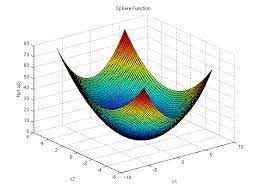

In [2]:
# Import necessaries librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# if not installed
#!pip install autograd
from autograd import grad, jacobian

In [3]:
#Define a bias for the function
f_bias = -450
d50 = 50
shift  = np.random.uniform(-100,100,d50)

In [4]:
def shifted_sphere(x):
    """Shifted-Sphere objective function.

    Has a global minimum at -450 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray
    """
    j = sum((x-shift) ** 2.0)

    return j + f_bias

In [5]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-100,100,d50)

In [7]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -100 * np.ones(d50)
max_bound_50 = 100 * np.ones(d50)
bounds_50 = (min_bound_50, max_bound_50)

In [18]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_sphere(x)
    history.append(fobj)

Let's compare the 2 options without gradient and using gradient

**1st option : Attempt with BFGS algorithm without gradient**

In [9]:
# Define a general function to optimize our function (shifted sphere function)
res_50 = minimize(shifted_sphere, x_0_50, bounds=bounds_50,method='BFGS',tol=1e-5,callback=callbackf,options={'disp': True})

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 6
         Function evaluations: 624
         Gradient evaluations: 12


d:\miniconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


**2nd option using the gradient of the cost function**

In [10]:
# Compute derivative of the function
jacobian_cost = jacobian(shifted_sphere)

In [11]:
#Set maximum number of iterations
MAX_ITER = 1000

In [19]:
res_jac_50 = minimize(shifted_sphere, x_0_50, bounds=bounds_50,jac = jacobian_cost,method='BFGS', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER})

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7


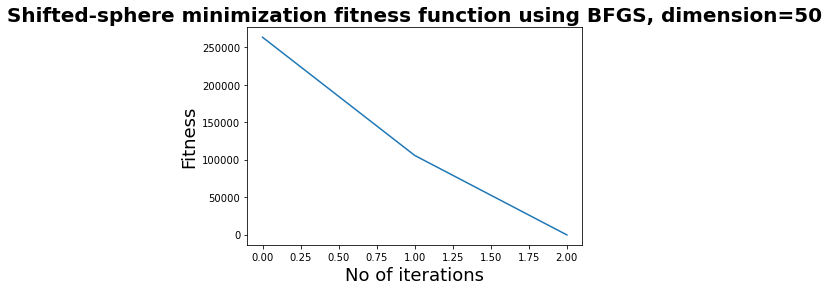

In [20]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [22]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [23]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = (min_bound_500, max_bound_500)

In [24]:
res_jac_500 = minimize(shifted_sphere, x_0_500, bounds=bounds_500,jac = jacobian_cost,method='BFGS', callback=callbackf, options={'disp': True, 'maxiter': MAX_ITER})

Optimization terminated successfully.
         Current function value: -450.000000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


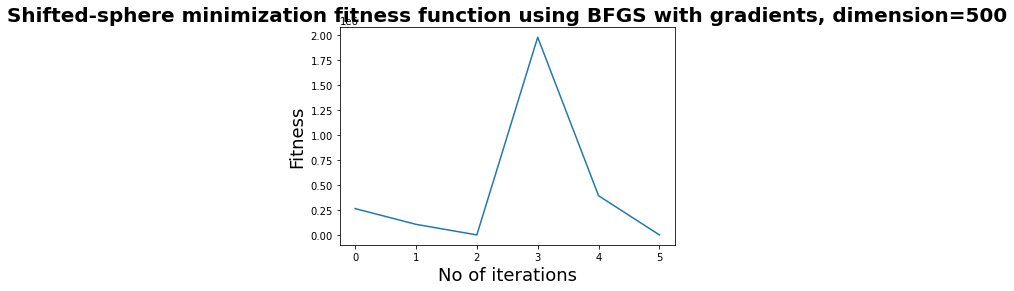

In [26]:
# Plot value of the fitness function 
plt.title("Shifted-sphere minimization fitness function using BFGS with gradients, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

We notice that when using the BFGS algorithm with the gradients the minimum is reached at only 3 iterations and 7 function evaluations !

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold (tol=gtol for the 'BFGS' algorithm) before successful termination.

We also used the PSO algorithm which works quite well but was more difficult to fine-tune because of it's greater number of parameters. And also it did not converge as quickly as the BFGS algorithm so finally we chose the later one.